# **Uncovering the Drivers of Stagnant Ecommerce Sales**
## A Customer and Operational Analysis

By Faishal Amin Abyan - Data Analytics Project


**Business Problem :**

The new ecommerce company has experienced stagnant sales performance over the past eight months, with consistent transaction and revenue figures. This project aims to uncover the root causes of this sales plateau.


# Import Library

In [1]:
# Library for data procesing and modeling
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Library for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

## Gathering Data

In [2]:
# Accessing data directory for analysis
data_directory = "https://raw.githubusercontent.com/faishalamin123/ecommerce_data/main/data/"

# Import Dataset
orders      = pd.read_csv(data_directory + 'orders_dataset.csv')
payments    = pd.read_csv(data_directory + 'order_payments_dataset.csv') 
reviews     = pd.read_csv(data_directory + 'order_reviews_dataset.csv')
items       = pd.read_csv(data_directory + 'order_items_dataset.csv')
category    = pd.read_csv(data_directory + 'product_category_name_translation.csv')
products    = pd.read_csv(data_directory + 'products_dataset.csv')
sellers     = pd.read_csv(data_directory + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_directory + 'geolocation_dataset.csv')
customers   = pd.read_csv(data_directory + 'customers_dataset.csv')

In [3]:
# To streamline the analysis process, multiple datasets were combined into a dictionary
data = {'orders'  : orders,
       'payments' : payments,
       'reviews'  : reviews,
       'items'    : items,
       'category' : category,
       'products' : products,
       'sellers'  : sellers,
       'geo'      : geolocation,
       'customers': customers}

In [4]:
# Display the first five rows of each dataset
for df_name, df in data.items():
    print(f"\nHead for DataFrame '{df_name}':")
    display(df.head())


Head for DataFrame 'orders':


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Head for DataFrame 'payments':


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Head for DataFrame 'reviews':


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Head for DataFrame 'items':


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Head for DataFrame 'category':


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



Head for DataFrame 'products':


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Head for DataFrame 'sellers':


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Head for DataFrame 'geo':


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



Head for DataFrame 'customers':


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Assessing the Data

#### Analyzing the `orders` table

In [5]:
print("Table Structure and Summary")
data['orders'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['orders'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['orders'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['orders'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Missing Value Analysis
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carr

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Based on the output, two primary issues were identified within the `orders` table:

- Missing Values: There are missing values in the following columns:
> order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- Incorrect Data Types: The data types for the following columns are inconsistent with the expected values:
> order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

#### Analyzing the `payments` table

In [6]:
print("Table Structure and Summary")
data['payments'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['payments'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['payments'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['payments'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Missing Value Analysis
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Duplicate Record Analysis : 0

Descriptive Statistics


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Based on the output above, no issues were found in the `payments` table

#### Analyzing the `reviews` table

In [7]:
print("Table Structure and Summary")
data['reviews'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['reviews'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['reviews'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['reviews'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Missing Value Analysis
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Duplicate Record Analysis : 0

Descriptive Statistics


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Based on the output above, two main issues were identified within the `reviews` table:

- Missing Values: There are missing values in the following columns:
> review_comment_title, review_comment_message
- Incorrect Data Types: The data types for the following columns are incorrect:
> review_creation_date, review_answer_timestamp

#### Analyzing the `items` table

In [8]:
print("Table Structure and Summary")
data['items'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['items'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['items'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['items'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Missing Value Analysis
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Duplicate Record Analysis : 0

Descriptive Statistics


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Based on the output above, one problem was found in the `items` table:

- The data type in the 'shipping_limit_date' column is incorrect.*

#### Analyzing the `category` table

In [9]:
print("Table Structure and Summary")
data['category'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['category'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['category'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['category'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Missing Value Analysis
product_category_name            0
product_category_name_english    0
dtype: int64

Duplicate Record Analysis : 0

Descriptive Statistics


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Based on the output above, no issues were found in the `category` table

#### Analyzing the `products` table

In [10]:
print("Table Structure and Summary")
data['products'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['products'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['products'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['products'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Missing Value Analysis
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty       

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Based on the output, a single issue was identified within the `products` table :
-  Missing Values: There are missing values in the following columns: 
>product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

#### Analyzing the `sellers` table

In [11]:
print("Table Structure and Summary")
data['sellers'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['sellers'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['sellers'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['sellers'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Missing Value Analysis
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Duplicate Record Analysis : 0

Descriptive Statistics


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Based on the output above, no issues were found in the `sellers` table

#### Analyzing the `geo` table

In [12]:
print("Table Structure and Summary")
data['geo'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['geo'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['geo'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['geo'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Missing Value Analysis
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Duplicate Record Analysis : 261831

Descriptive Statistics


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Based on the output, one issue was found in the `geo` table: there are 261,831 duplicate rows.

#### Analyzing the `customers` table

In [13]:
print("Table Structure and Summary")
data['customers'].info()

print("====================================================")
print("\nMissing Value Analysis")
print(data['customers'].isna().sum())

print("====================================================")
print("\nDuplicate Record Analysis :", data['customers'].duplicated().sum())

print("====================================================")
print("\nDescriptive Statistics")
data['customers'].describe(include="all")

Table Structure and Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Missing Value Analysis
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicate Record Analysis : 0

Descriptive Statistics


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Based on the output above, no issues were found in the `customers` table

## Data cleaning
Based on the data assessment results from the previous subsection, three primary data quality issues were identified:
- Incorrect data types,
- Duplicate records, and
- Missing values.

### Converting object data type to datetime
In this section, datetime columns with an object data type are converted to the datetime data type. Subsequently, the data format is changed from YYYY-MM-DD HH:mm:ss to YYYY-MM-DD.

In [14]:
# The dictionary contains the target columns that will have their data types changed.
date_columns = {
    'orders' : ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'],
    'reviews': ['review_creation_date', 'review_answer_timestamp'],
    'items'  : ['shipping_limit_date']
}

# Loop through each DataFrame in the dictionary
for df_name, df in data.items():
    if df_name in date_columns:
        for col in date_columns[df_name]:
            df[col] = pd.to_datetime(df[col], errors='coerce').dt.strftime('%Y-%m-%d')
            df[col] = pd.to_datetime(df[col], errors='coerce')

In [15]:
# Re-examining the table's structure
for df_name in ['orders', 'reviews', 'items']:
    df = data[df_name]
    print(f"\nInformasi dari tabel '{df_name}' :")
    df.info()


Informasi dari tabel 'orders' :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

Informasi dari tabel 'reviews' :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 

As shown in the results, the data type of the specified column is now datetime.

### Removing duplicate data

In [16]:
# Removing duplicate data from the 'geo' table.
data['geo'].drop_duplicates(inplace=True)

# Checking the geo table again
data['geo'].info()
print("\nNumber of duplicate rows in the 'geo' DataFrame :", data['geo'].duplicated().sum())
data['geo']

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB

Number of duplicate rows in the 'geo' DataFrame : 0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


We observed that the 'geolocation_zip_code_prefix' column contains duplicate values. We will keep the first instance of each unique zip code and delete the rest.

In [17]:
data['geo'] = data['geo'].drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')
data['geo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


### Handling missing values

Dataframes containing missing values include:

- orders: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- reviews: review_comment_title, review_comment_message
- products: product_category_name, product_name_length, product_description_length, product_photos_qty

In [18]:
tables_to_check = ['orders', 'reviews', 'products']

for df_name in tables_to_check:
    df = data[df_name]
    missing_values = df[df.isna().any(axis=1)]
    print(f"\nMissing values on '{df_name}'")
    display(missing_values)


Missing values on 'orders'


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05,2018-06-05,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11,2018-01-11,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15



Missing values on 'reviews'


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02



Missing values on 'products'


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Handling Missing Values in the Three DataFrames
Here's how we handled missing values in the three dataframes:

1. `orders` dataframe:

    The number of missing values was quite high, so dropping entire rows would result in a significant loss of information. The values in columns *order_approved_at, order_delivered_carrier_date,* and *order_delivered_customer_date* cannot be arbitrarily changed as they are related to the order_status column.

2. `reviews` dataframe:

    A substantial number of missing values were found. Dropping rows would lead to a loss of important information. These empty columns indicate that customers did not provide information in those fields when writing their reviews. Therefore, missing values in the review_comment_title column will be filled with "no comment title", and missing values in the review_comment_message column will be filled with "no comment message".

3. `products` dataframe:

    The number of missing values is relatively small, and there's no other data available to help fill in these gaps. As a result, missing values in the product_category_name column will be replaced with "others". Other columns with missing values will be ignored.

##### Handling Missing Values in `reviews`

In [19]:
# Replacing missing values in the 'review_comment_title' column with "no comment title"
data['reviews']['review_comment_title'].fillna("no comment title", inplace=True)

# Replacing missing values in the 'review_comment_message' column with "no comment message"
data['reviews']['review_comment_message'].fillna("no comment message", inplace=True)

# Show the result
data['reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment title,no comment message,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment title,no comment message,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment title,no comment message,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,no comment title,no comment message,2018-07-07,2018-07-14
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,no comment title,no comment message,2017-12-09,2017-12-11
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,no comment title,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,no comment title,no comment message,2018-07-01,2018-07-02


##### Handling Missing Values in `products`

First, we will replace the 'product_category_name' column in the 'products' DataFrame with the 'product_category_name_english' column from the 'category' DataFrame

In [20]:
merged_products = pd.merge(data['products'], data['category'], how='left', on='product_category_name')
merged_products['product_category_name'] = merged_products['product_category_name_english']
merged_products = merged_products.drop(columns=['product_category_name_english'])

# Updating a dictionary with modified DataFrame data
data['products'] = merged_products

In [21]:
# Replacing missing values in the 'product_category_name' column with "others"
data['products']['product_category_name'].fillna("others", inplace=True)

others_name = data['products'][data['products']['product_category_name']=='others']
display(others_name.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,others,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,others,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,others,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,others,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,others,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [22]:
for df_name, df in data.items():
    print(f"\ninformation of DataFrame '{df_name}':")
    display(df.info())


information of DataFrame 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


None


information of DataFrame 'payments':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


information of DataFrame 'reviews':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


None


information of DataFrame 'items':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


None


information of DataFrame 'category':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None


information of DataFrame 'products':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


information of DataFrame 'sellers':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


information of DataFrame 'geo':
<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 999846
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


None


information of DataFrame 'customers':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

# Exploratory Data Analysis

## Track monthly sales performance
For the purpose of this analysis, the 'orders', 'customers', and 'items' tables were combined to form a single dataset called 'orders_detail'.

In [23]:
# 1. Merge orders with customers on 'customer_id'
orders_detail = pd.merge(orders, customers, on='customer_id', how='left')

# 2. Merge the result with items on 'order_id'
orders_detail = pd.merge(orders_detail, items, on='order_id', how='left')

# Display the first few rows of the final DataFrame
orders_detail

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12,179.99,40.59


In [24]:
orders_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

Monthly sales figures were calculated and stored in a new table named 'monthly_sales' for further analysis.

In [25]:
# Create new dataframe named monthly_sales
monthly_sales = pd.DataFrame()

# Extract the date
orders_detail['month'] = pd.to_datetime(orders_detail['order_purchase_timestamp']).dt.to_period('M')

# Assigning distinct monthly values to the 'month' column and ordering them sequentially
unique_months = orders_detail['month'].sort_values().unique()
monthly_sales['month'] = unique_months

# Transformed the 'month' column into a datetime data type, specifically formatted as 'YYYY-MM' for further time-based analysis
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'].astype(str))

# Counting the number of sales per month
monthly_sales['sales_volume'] = orders_detail.groupby('month')['order_id'].count().reindex(unique_months, fill_value=0).values

# Calculating monthly sales value
monthly_sales['sales_value'] = orders_detail.groupby('month')['price'].sum().reindex(unique_months, fill_value=0).values

# Deleting rows with NaT values
monthly_sales = monthly_sales.dropna(subset=['month'])

# Show the result
display(monthly_sales)

,month,sales_volume,sales_value
0,2016-09-01,7,267.36
1,2016-10-01,379,49507.66
2,2016-12-01,1,10.90
3,2017-01-01,966,120312.87
4,2017-02-01,1998,247303.02
5,2017-03-01,3041,374344.30
6,2017-04-01,2697,359927.23
7,2017-05-01,4176,506071.14
8,2017-06-01,3611,433038.60
9,2017-07-01,4576,498031.48


We found that November 2016 was missing. So, we added this month and assumed no sales happened that month. We'll only look at data up to August 2018 because the data for September and October might not be complete yet.

In [26]:
# Filter the data to include only observations up to August 1st, 2018.
filtered_sales = monthly_sales.loc[monthly_sales['month'] <= pd.to_datetime('2018-08-01')]

# Adding new data for November 1, 2016
new_data = pd.DataFrame({'month': [pd.to_datetime('2016-11-01')],
                         'sales_volume': [0],
                         'sales_value': [0]})

# Inserting new data at index position 2
monthly_sales = pd.concat([filtered_sales.iloc[:2], new_data, filtered_sales.iloc[2:]]).reset_index(drop=True)

# Final monthly sales data
display(monthly_sales)

,month,sales_volume,sales_value
0,2016-09-01,7,267.36
1,2016-10-01,379,49507.66
2,2016-11-01,0,0.00
3,2016-12-01,1,10.90
4,2017-01-01,966,120312.87
5,2017-02-01,1998,247303.02
6,2017-03-01,3041,374344.30
7,2017-04-01,2697,359927.23
8,2017-05-01,4176,506071.14
9,2017-06-01,3611,433038.60


To facilitate data comprehension, a line chart will be constructed

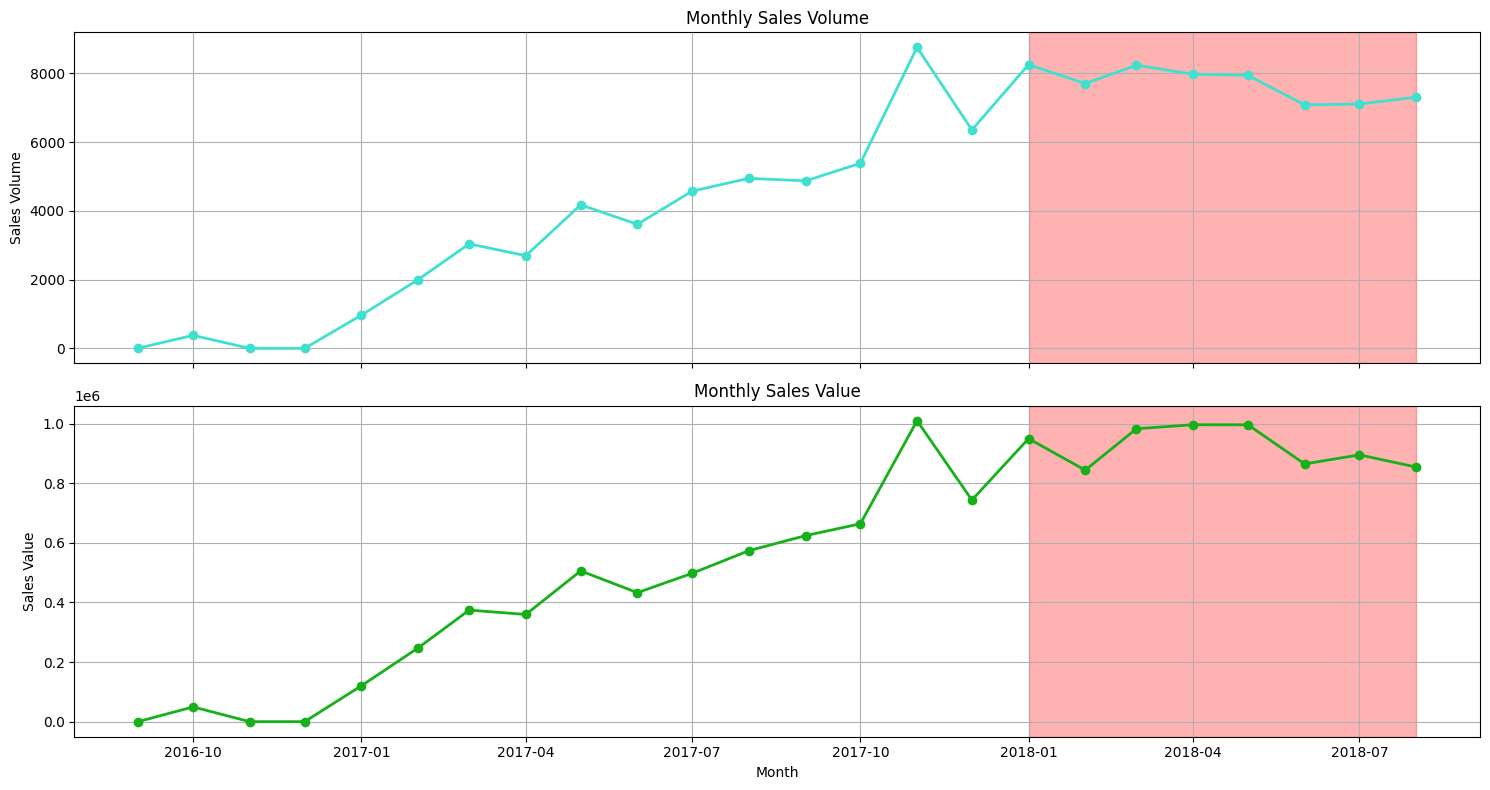

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex=True)

# Sales Volume
axes[0].plot(
    monthly_sales['month'],
    monthly_sales['sales_volume'],
    marker='o', 
    linewidth=2,
    color='turquoise'
)
axes[0].set_ylabel('Sales Volume')
axes[0].set_title('Monthly Sales Volume')
axes[0].grid(True)

# Add highlight
axes[0].axvspan('2018-01-01', '2018-08-01', color='red', alpha=0.3)

# Sales Value
axes[1].plot(
    monthly_sales['month'],
    monthly_sales['sales_value'],
    marker='o', 
    linewidth=2,
    color='#15B01A'
)
axes[1].set_ylabel('Sales Value')
axes[1].set_xlabel('Month')
axes[1].set_title('Monthly Sales Value')
axes[1].grid(True)

# add highlight
axes[1].axvspan('2018-01-01', '2018-08-01', color='red', alpha=0.3)

plt.tight_layout()
plt.show()

Based on the line chart above, it can be observed that over the last eight months, from January 2018 to August 2018, the e-commerce sales performance has stagnated. There was no significant increase or decrease in sales performance compared to previous months. To predict future trends, a forecasting analysis will be conducted for the next 12 months.

c:\Users\Faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


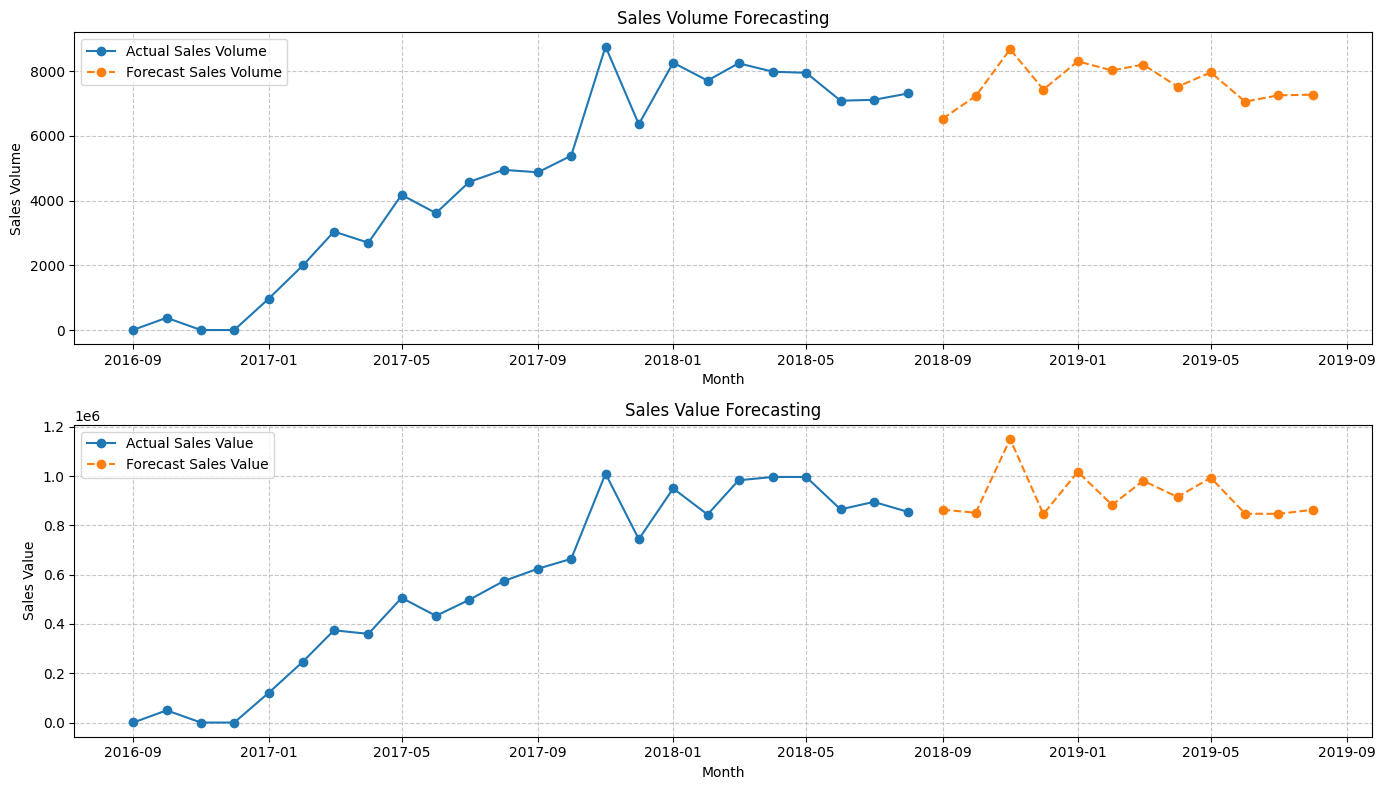

(2018-09-01    6525.548416
 2018-10-01    7228.412883
 2018-11-01    8674.872469
 2018-12-01    7429.147328
 2019-01-01    8299.518344
 2019-02-01    8019.311781
 2019-03-01    8200.894246
 2019-04-01    7518.324119
 2019-05-01    7957.988435
 2019-06-01    7054.837482
 2019-07-01    7250.946070
 2019-08-01    7270.186932
 Freq: MS, dtype: float64,
 2018-09-01    8.636880e+05
 2018-10-01    8.516275e+05
 2018-11-01    1.150676e+06
 2018-12-01    8.459383e+05
 2019-01-01    1.017463e+06
 2019-02-01    8.833799e+05
 2019-03-01    9.813198e+05
 2019-04-01    9.152873e+05
 2019-05-01    9.937099e+05
 2019-06-01    8.475943e+05
 2019-07-01    8.470218e+05
 2019-08-01    8.635167e+05
 Freq: MS, dtype: float64)

In [28]:
# Time series forecasting
# Set the 'month' column as the index
monthly_sales_copy = monthly_sales.copy()
monthly_sales_copy.set_index('month', inplace=True)

# Fit the Holt-Winters model for sales_volume
model_volume = ExponentialSmoothing(monthly_sales_copy['sales_volume'], seasonal='add', seasonal_periods=12).fit()
forecast_volume = model_volume.forecast(steps=12)

# Fit the Holt-Winters model for sales_value
model_value = ExponentialSmoothing(monthly_sales_copy['sales_value'], seasonal='add', seasonal_periods=12).fit()
forecast_value = model_value.forecast(steps=12)

# Plotting the results
plt.figure(figsize=(14, 8))

# Sales Volume
plt.subplot(2, 1, 1)
plt.plot(monthly_sales_copy.index, monthly_sales_copy['sales_volume'], label='Actual Sales Volume', marker='o')
plt.plot(forecast_volume.index, forecast_volume, label='Forecast Sales Volume', marker='o', linestyle='--')
plt.title('Sales Volume Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Sales Value
plt.subplot(2, 1, 2)
plt.plot(monthly_sales_copy.index, monthly_sales_copy['sales_value'], label='Actual Sales Value', marker='o')
plt.plot(forecast_value.index, forecast_value, label='Forecast Sales Value', marker='o', linestyle='--')
plt.title('Sales Value Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

forecast_volume, forecast_value


> The forecast indicates that sales performance will remain stagnant in the upcoming year

## RFM Analysis

In [29]:
# Hitung nilai dari Recency, Frequency, dan Monetary
current_date = orders_detail['order_purchase_timestamp'].max()  # last date
rfm_data = orders_detail.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Ubah nama kolom
rfm_data.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Menampilkan tabel
print("Customer terakhir yang aktif melakukan transaksi")
display(rfm_data.sort_values(by='recency', ascending = True).head())

print("\nFrekuensi pembelian customer")
display(rfm_data.sort_values(by='frequency', ascending = False).head())

print("\nTotal nilai transaksi customer")
display(rfm_data.sort_values(by="monetary", ascending = False).head())

Customer terakhir yang aktif melakukan transaksi


,customer_id,recency,frequency,monetary
63970,a4b417188addbc05b26b72d5e44837a1,0,1,0.0
51713,856336203359aa6a61bf3826f7d84c49,1,1,0.0
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,14,1,0.0
74611,bf6181a85bbb4115736c0a8db1a53be3,16,1,0.0
15595,2823ffda607a2316375088e0d00005ec,18,1,0.0



Frekuensi pembelian customer


,customer_id,recency,frequency,monetary
97978,fc3d1daec319d62d49bfb5e1f83123e9,458,21,31.80
73858,bd5d39761aa56689a265d95d8d32b8be,420,20,1974.00
74118,be1b70680b9f9694d8c70f41fa3dc92b,237,20,2000.00
67608,adb32467ecc74b53576d9d13a5a55891,625,15,765.00
6511,10de381f8a8d23fff822753305f71cae,328,15,982.35



Total nilai transaksi customer


,customer_id,recency,frequency,monetary
8546,1617b1357756262bfa56ab541c47bc16,383,8,13440.0
91985,ec5b2ba62e574342386871631fafd3fc,94,4,7160.0
77522,c6e2731c5b391845f6800c97401a43a9,612,1,6735.0
95124,f48d464a0baaea338cb25f816991ab1f,84,1,6729.0
24771,3fd6777bbce08a352fddd04e4a7cc8f6,511,1,6499.0


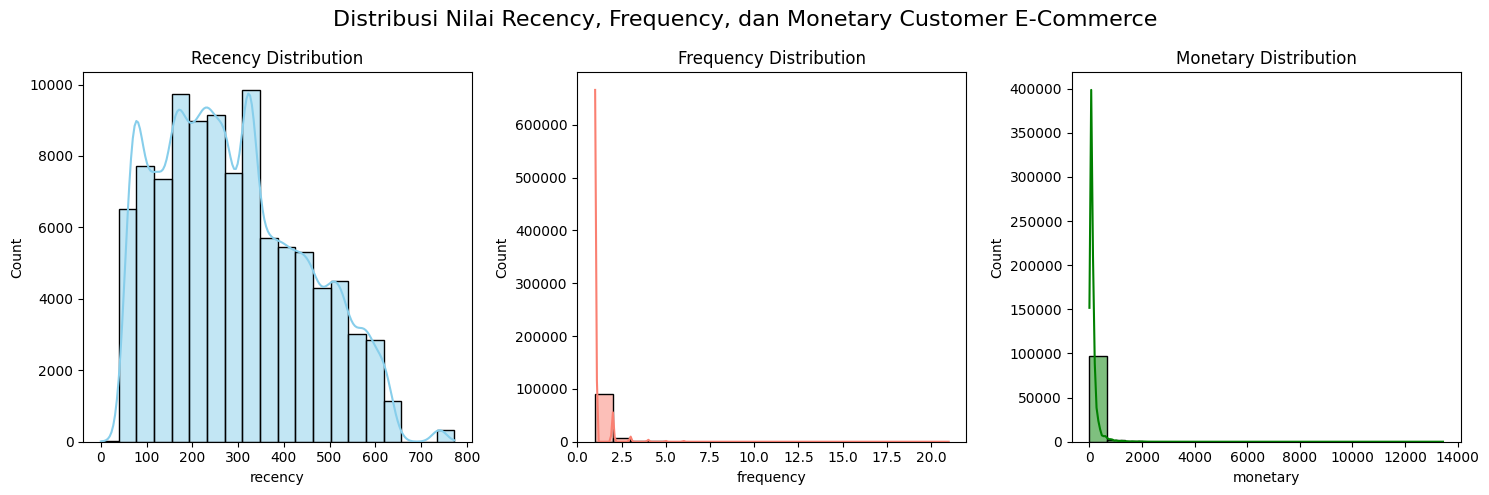

In [30]:
# Visualisasi analisis RFM
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Recency
sns.histplot(rfm_data['recency'], bins=20, kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Recency Distribution')

# Plot Frequency
sns.histplot(rfm_data['frequency'], bins=20, kde=True, color='salmon', ax=axs[1])
axs[1].set_title('Frequency Distribution')

# Plot Monetary
sns.histplot(rfm_data['monetary'], bins=20, kde=True, color='green', ax=axs[2])
axs[2].set_title('Monetary Distribution')

fig.suptitle('Distribusi Nilai Recency, Frequency, dan Monetary Customer E-Commerce', fontsize=16)
plt.tight_layout()
plt.show()

In [31]:
# Melakukan customer profiling berdasarkan recency, frequency, & monetary score 
# Mengurutkan customer berdasarkan recency, frequency, & monetary score
rfm_data['r_rank'] = rfm_data['recency'].rank(ascending=False)
rfm_data['f_rank'] = rfm_data['frequency'].rank(ascending=True)
rfm_data['m_rank'] = rfm_data['monetary'].rank(ascending=True)

# Menormalisasi ranking customers
rfm_data['r_rank_norm'] = (rfm_data['r_rank']/rfm_data['r_rank'].max())*100
rfm_data['f_rank_norm'] = (rfm_data['f_rank']/rfm_data['f_rank'].max())*100
rfm_data['m_rank_norm'] = (rfm_data['m_rank']/rfm_data['m_rank'].max())*100
 
rfm_data.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

# Menentukan skor rfm customer
rfm_data['RFM_score'] = 0.15*rfm_data['r_rank_norm']+0.28 * \
    rfm_data['f_rank_norm']+0.57*rfm_data['m_rank_norm']
rfm_data['RFM_score'] *= 0.05
rfm_data = rfm_data.round(2)
rfm_data[['customer_id', 'RFM_score']].head(7)

# Segmentasi customer berdasarkan RFM_score
rfm_data["customer_segment"] = np.where(
    rfm_data['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_data['RFM_score'] > 4, "High value customers",(np.where(
            rfm_data['RFM_score'] > 3, "Medium value customers", np.where(
                rfm_data['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_data[['customer_id', 'RFM_score', 'customer_segment']].head(10)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.36,Low value customers
1,000161a058600d5901f007fab4c27140,1.68,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,2.97,Low value customers
3,0002414f95344307404f0ace7a26f1d5,2.93,Low value customers
4,000379cdec625522490c315e70c7a9fb,2.68,Low value customers
5,0004164d20a9e969af783496f3408652,1.76,Low value customers
6,000419c5494106c306a97b5635748086,1.58,lost customers
7,00046a560d407e99b969756e0b10f282,2.86,Low value customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.06,Low value customers
9,000598caf2ef4117407665ac33275130,4.18,High value customers


In [32]:
# Membuat pivot table jumlah tiap segmentasi customer
customer_segment_data = rfm_data.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_data

,customer_segment,customer_id
0,High value customers,3584
1,Low value customers,46737
2,Medium value customers,28263
3,Top customers,861
4,lost customers,19996


In [33]:
# Define the desired order of customer segments
customer_segment_order = ['Top customers', 'High value customers', 'Medium value customers', 'Low value customers', 'lost customers']

# Create a categorical column with the specified order
customer_segment_data['customer_segment'] = pd.Categorical(
    customer_segment_data['customer_segment'], 
    categories=customer_segment_order, 
    ordered=True
)

# Sort the DataFrame by the categorical column
customer_segment_data = customer_segment_data.sort_values('customer_segment')

customer_segment_data


,customer_segment,customer_id
3,Top customers,861
0,High value customers,3584
2,Medium value customers,28263
1,Low value customers,46737
4,lost customers,19996


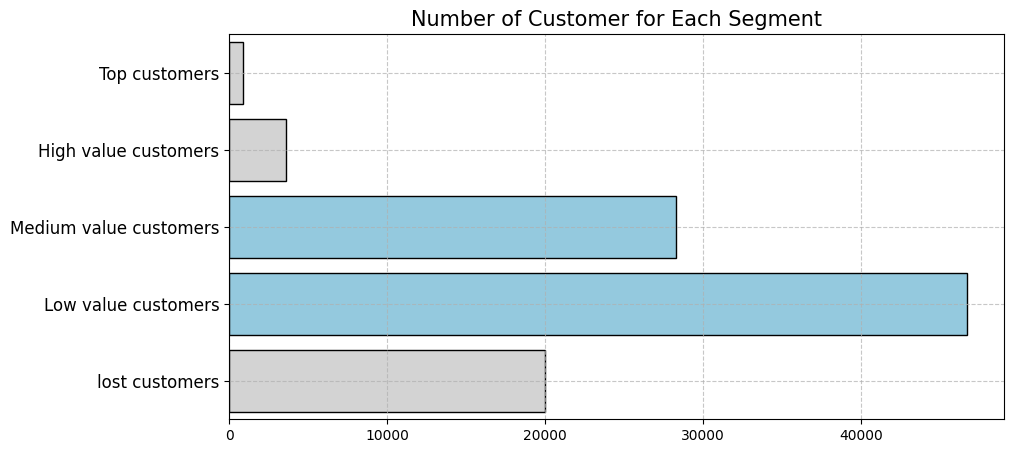

In [35]:
# Membuat visualisasi barplot jumlah segmentasi customer
customer_segment_data['customer_segment'] = pd.Categorical(customer_segment_data['customer_segment'], [
    "Top customers",
    "High value customers", 
    "Medium value customers",
    "Low value customers",
    "lost customers"
])

plt.figure(figsize=(10, 5))
colors_ = ["lightgray", "lightgray", "skyblue", "skyblue", "lightgray"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    hue="customer_segment",
    data=customer_segment_data.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    edgecolor="black"
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Recency Analysis

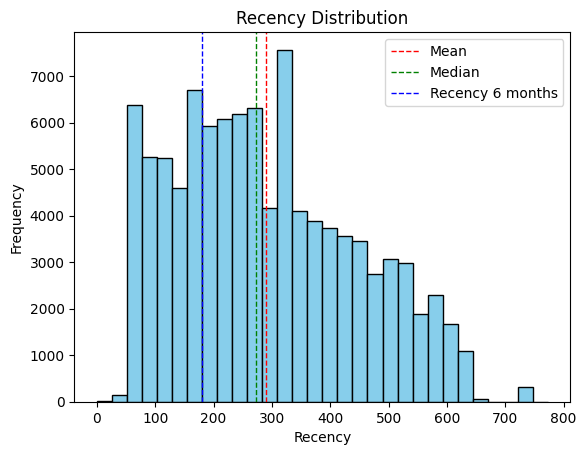

In [36]:
# Calculate mean and median
mean_recency = rfm_data['recency'].mean()
median_recency = rfm_data['recency'].median()

# Create the histogram
plt.hist(rfm_data['recency'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed

# Add mean and median lines
plt.axvline(mean_recency, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_recency, color='green', linestyle='dashed', linewidth=1, label='Median')

# Add a dashed line at recency value 90
plt.axvline(180, color='blue', linestyle='dashed', linewidth=1, label='Recency 6 months')

# Add labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')
plt.legend()

plt.show()

In [37]:
# Define recency bins
bins_recency = [0, 90, 180, 365, float('inf')]  # Use float('inf') for the upper bound of the last bin
labels_recency = ['< 90 days', '91 - 180 days', '181 - 365 days', '> 365 days']

# Create a new column for recency categories
rfm_data['recency_category'] = pd.cut(rfm_data['recency'], bins=bins_recency, labels=labels_recency)

# Count users in each recency category
recency_counts = rfm_data['recency_category'].value_counts()

# Calculate percentages
total_users = len(df)
recency_percentages = (recency_counts / total_users) * 100

# Create a DataFrame to display the results
recency_result_df = pd.DataFrame({'Recency Category': recency_counts.index, 'Count': recency_counts.values, 'Percentage (%)': recency_percentages.values.round(2)})

# Print the DataFrame
print(recency_result_df.to_string(index=False))

Recency Category  Count  Percentage (%)
  181 - 365 days  41134           41.37
      > 365 days  29974           30.14
   91 - 180 days  18640           18.74
       < 90 days   9692            9.75


### Frequency Analysis

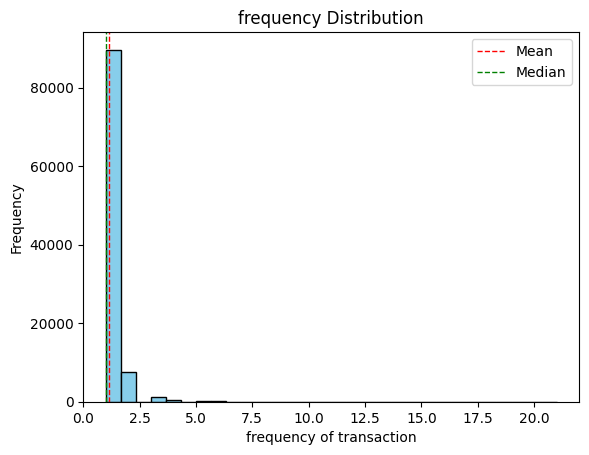

In [38]:
# Calculate mean and median
mean_frequency = rfm_data['frequency'].mean()
median_frequency = rfm_data['frequency'].median()

# Create the histogram
plt.hist(rfm_data['frequency'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed

# Add mean and median lines
plt.axvline(mean_frequency, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_frequency, color='green', linestyle='dashed', linewidth=1, label='Median')

# Add labels and title
plt.xlabel('frequency of transaction')
plt.ylabel('Frequency')
plt.title('frequency Distribution')
plt.legend()

plt.show()

In [39]:
# Define frequency bins
bins_frequency = [0, 1, 2, 5, 10, float('inf')]  # Use float('inf') for the upper bound of the last bin
labels_frequency = ['One-Time Buyer', 'Two-Time Buyer', '3-5 Purchases', '6-10 Purchases', '11+ Purchases']

# Create a new column for frequency categories
rfm_data['frequency_category'] = pd.cut(rfm_data['frequency'], bins=bins_frequency, labels=labels_frequency)

# Count users in each frequency category
frequency_counts = rfm_data['frequency_category'].value_counts()

# Calculate percentages
total_users = len(df)
frequency_percentages = (frequency_counts / total_users) * 100

# Create a DataFrame to display the results
frequency_result_df = pd.DataFrame({'frequency Category': frequency_counts.index, 'Count': frequency_counts.values, 'Percentage (%)': frequency_percentages.values.round(2)})

# Print the DataFrame
print(frequency_result_df.to_string(index=False))

frequency Category  Count  Percentage (%)
    One-Time Buyer  89638           90.14
    Two-Time Buyer   7516            7.56
     3-5 Purchases   2031            2.04
    6-10 Purchases    239            0.24
     11+ Purchases     17            0.02


## Are customers dissatisfied with their purchased products?

### Customer Review

In [40]:
# Menghitung jumlah pelanggan unik berdasarkan review score
customer_reviews_counts = data['reviews'].groupby(by='review_score').order_id.nunique().reset_index()

# Menghitung persentase dari total
total_order = data['reviews']['order_id'].nunique()
customer_reviews_counts['percentage'] = (customer_reviews_counts['order_id'] / total_order) * 100

# Menampilkan hasil
display(customer_reviews_counts.round(2))

,review_score,order_id,percentage
0,1,11393,11.55
1,2,3148,3.19
2,3,8160,8.27
3,4,19098,19.35
4,5,57076,57.84


### Shipping Time

In [41]:
orders_detail['shipping_time'] = (orders_detail['order_delivered_customer_date'] - orders_detail['order_approved_at']).dt.days


count    110181.000000
mean         11.886668
std           9.422457
min          -7.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: shipping_time, dtype: float64


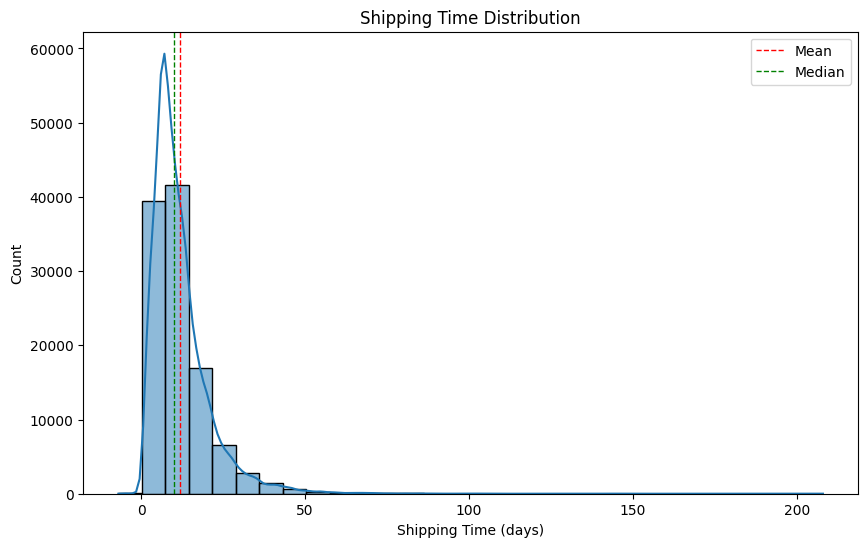

In [42]:
# Calculate mean and median
mean_shipping = orders_detail['shipping_time'].mean()
median_shipping = orders_detail['shipping_time'].median()

# Descriptive statistics
print(orders_detail['shipping_time'].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(orders_detail['shipping_time'], bins=30, kde=True)
plt.title('Shipping Time Distribution')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Count')

# Add mean and median lines
plt.axvline(mean_shipping, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_shipping, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.legend()
plt.show()


In [43]:
# Drop rows with negative shipping times
orders_detail = orders_detail[orders_detail['shipping_time'] >= 0]

count    110137.000000
mean         11.892479
std           9.419787
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: shipping_time, dtype: float64


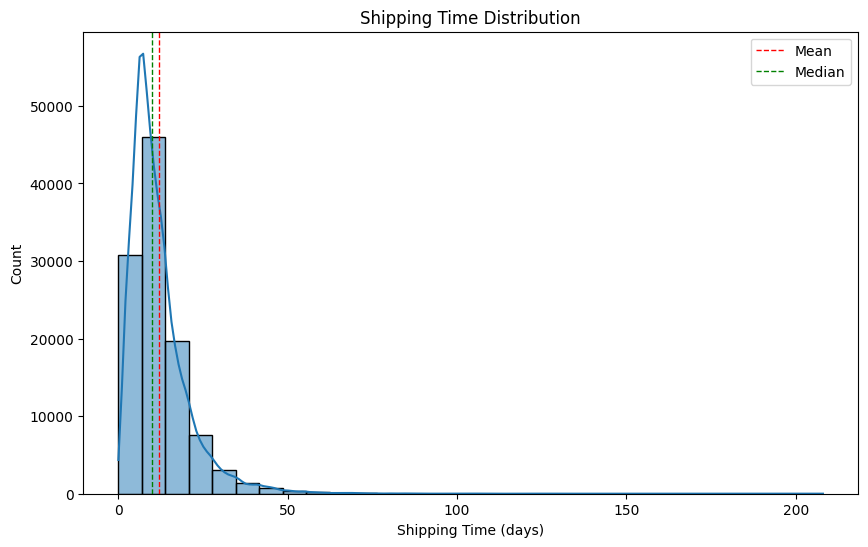

In [44]:
# Calculate mean and median
mean_shipping = orders_detail['shipping_time'].mean()
median_shipping = orders_detail['shipping_time'].median()

# Descriptive statistics
print(orders_detail['shipping_time'].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(orders_detail['shipping_time'], bins=30, kde=True)
plt.title('Shipping Time Distribution')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Count')

# Add mean and median lines
plt.axvline(mean_shipping, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_shipping, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.legend()
plt.show()


## Voucher Expenses Analysis

In [45]:
# Define frequency bins
bins_shipping = [0, 5, 10, 15, 30, float('inf')]
labels_shipping = ['0-5 days', '5-10 days', '10-15 days', '15-30 days', '>30 days']

# Create a new column for frequency categories using loc
orders_detail.loc[:, 'shipping_category'] = pd.cut(orders_detail['shipping_time'], bins=bins_shipping, labels=labels_shipping)

# Count users in each frequency category
shipping_counts = orders_detail['shipping_category'].value_counts()

# Calculate percentages
total_users = len(orders_detail)  # Use orders_detail directly
shipping_percentages = (frequency_counts / total_users) * 100

# Create a DataFrame to display the results
shipping_result_df = pd.DataFrame({'Shipping Category': shipping_counts.index, 'Count': shipping_counts.values, 'Percentage (%)': shipping_percentages.values.round(2)})

# Print the DataFrame
print(shipping_result_df.to_string(index=False))

Shipping Category  Count  Percentage (%)
        5-10 days  38301           81.39
       10-15 days  23932            6.82
         0-5 days  22187            1.84
       15-30 days  21138            0.22
         >30 days   4478            0.02


C:\Users\Faisal\AppData\Local\Temp\ipykernel_10328\1416082311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_detail.loc[:, 'shipping_category'] = pd.cut(orders_detail['shipping_time'], bins=bins_shipping, labels=labels_shipping)


In [46]:
# Merge the tables on 'order_id'
order_payments = orders.merge(payments, on='order_id', how='left')
order_payments

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,1.0,credit_card,4.0,441.16


In [47]:
# Filter payments where payment_type is "voucher"
voucher_payments = order_payments[order_payments['payment_type'] == 'voucher']

# Convert order_purchase_timestamp to datetime format
voucher_payments['order_purchase_timestamp'] = pd.to_datetime(voucher_payments['order_purchase_timestamp'])

# Create a new column for month (YYYY-MM-01)
voucher_payments['month'] = voucher_payments['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Group by month and calculate the sum of payment_value
voucher_expenses = voucher_payments.groupby('month')['payment_value'].sum().reset_index()

# Rename the columns
voucher_expenses.columns = ['month', 'voucher_value']

# Format the month column as YYYY-MM-01
voucher_expenses['month'] = voucher_expenses['month'].dt.strftime('%Y-%m-01')

voucher_expenses

C:\Users\Faisal\AppData\Local\Temp\ipykernel_10328\661941189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_payments['order_purchase_timestamp'] = pd.to_datetime(voucher_payments['order_purchase_timestamp'])
C:\Users\Faisal\AppData\Local\Temp\ipykernel_10328\661941189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_payments['month'] = voucher_payments['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()


,month,voucher_value
0,2016-10-01,879.07
1,2017-01-01,4054.40
2,2017-02-01,6167.39
3,2017-03-01,9621.33
4,2017-04-01,11603.07
5,2017-05-01,16195.20
6,2017-06-01,12809.78
7,2017-07-01,18273.94
8,2017-08-01,15373.98
9,2017-09-01,17545.70


In [48]:
# Create a new DataFrame with the data to insert
new_data = pd.DataFrame({'month': ['2016-11-01', '2016-12-01'], 'voucher_value': [0, 0]})

# Insert the new data after the first row (index 0)
voucher_expenses = pd.concat([voucher_expenses.iloc[:1], new_data, voucher_expenses.iloc[1:]]).reset_index(drop=True)

# Convert the 'month' column to datetime format
voucher_expenses['month'] = pd.to_datetime(voucher_expenses['month'])

# Extract the date part and convert it back to string in YYYY-MM-DD format
voucher_expenses['month'] = voucher_expenses['month'].dt.date.astype(str)

# Drop the specified rows
voucher_expenses = voucher_expenses.drop([23, 24], axis=0)

voucher_expenses


,month,voucher_value
0,2016-10-01,879.07
1,2016-11-01,0.00
2,2016-12-01,0.00
3,2017-01-01,4054.40
4,2017-02-01,6167.39
5,2017-03-01,9621.33
6,2017-04-01,11603.07
7,2017-05-01,16195.20
8,2017-06-01,12809.78
9,2017-07-01,18273.94


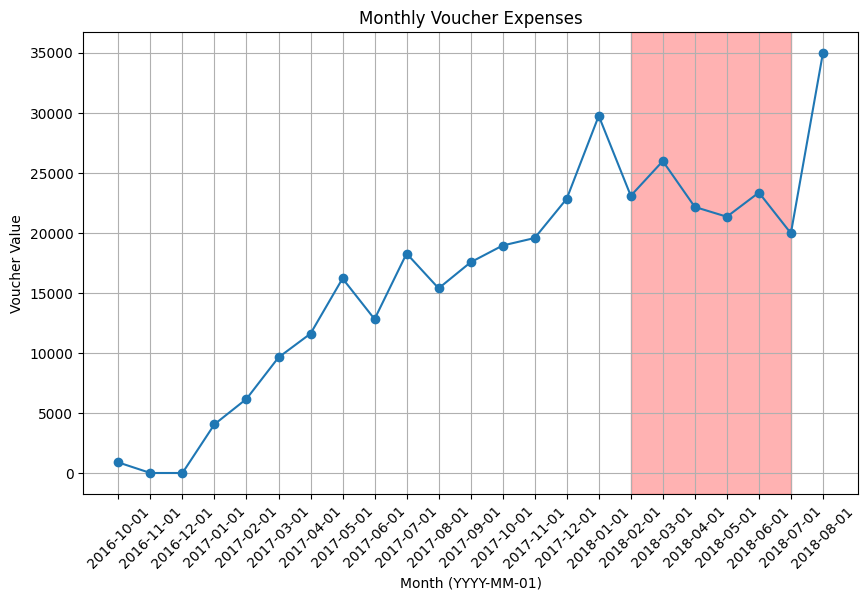

In [49]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(voucher_expenses['month'], voucher_expenses['voucher_value'], marker='o', linestyle='-')
plt.title('Monthly Voucher Expenses')
plt.xlabel('Month (YYYY-MM-01)')
plt.ylabel('Voucher Value')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add highlight
plt.axvspan('2018-02-01', '2018-07-01', color='red', alpha=0.3)

plt.show()

## Correlation of voucher Expenses and Sales Performance

In [50]:
# Convert 'month' column in both DataFrames to datetime64[ns]
voucher_expenses['month'] = pd.to_datetime(voucher_expenses['month'])
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'])

# Merge the DataFrames based on the 'month' column
merged_data = voucher_expenses.merge(monthly_sales, on='month', how='inner')

In [51]:
# Calculate correlation matrix
correlation_matrix = merged_data[['voucher_value', 'sales_volume', 'sales_value']].corr()

print(correlation_matrix)

               voucher_value  sales_volume  sales_value
voucher_value       1.000000      0.923273     0.913866
sales_volume        0.923273      1.000000     0.995801
sales_value         0.913866      0.995801     1.000000


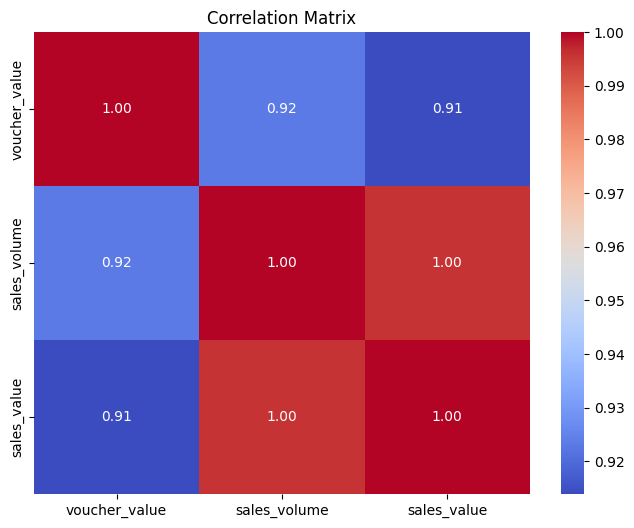

In [52]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

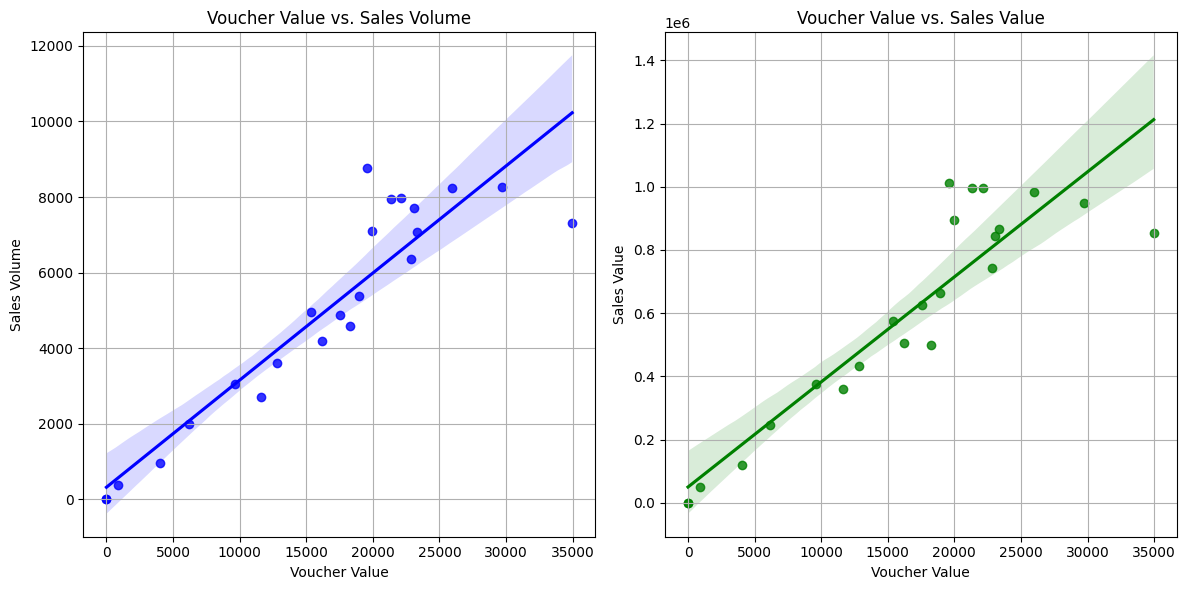

In [53]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figure size as needed

# Scatter plot between voucher_value and sales_volume (subplot 1)
sns.regplot(x='voucher_value', y='sales_volume', data=merged_data, color='blue', ax=ax1)
ax1.set_title('Voucher Value vs. Sales Volume')
ax1.set_xlabel('Voucher Value')
ax1.set_ylabel('Sales Volume')
ax1.grid(True)

# Scatter plot between voucher_value and sales_value (subplot 2)
sns.regplot(x='voucher_value', y='sales_value', data=merged_data, color='green', ax=ax2)
ax2.set_title('Voucher Value vs. Sales Value')
ax2.set_xlabel('Voucher Value')
ax2.set_ylabel('Sales Value')
ax2.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# **Conclusion**

As a new e-commerce platform, vouchers are crucial for customer acquisition and retention. Our analysis confirms a strong correlation between voucher spending and sales performance. To address the challenge of low customer retention, a multifaceted promotional strategy, including discounts and cashback, is essential to encourage repeat purchases and foster loyalty.